## Step 1 : Importing all the necessary packages and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
sns.set_style("dark")

In [3]:
os.getcwd()

'C:\\Users\\win10\\Desktop'

In [4]:
os.chdir("C:\\Users\\win10\\Desktop\\")

## Step 2: Using the pandas read_csv method to load the dataset into a dataframe

In [5]:
data = pd.read_csv("turnover.csv")

In [6]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Step 3: Let us perform some basic plotting to get a visual count of categorical columns and distribution of numerical columns in our dataset

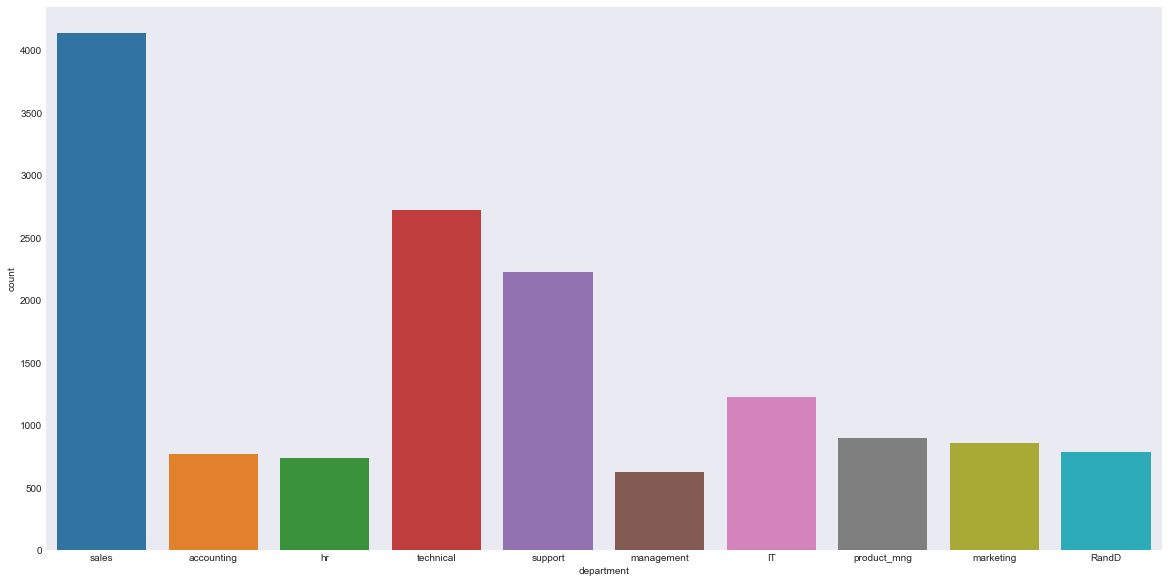

In [8]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "department", data = data);

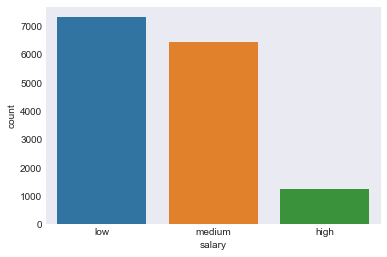

In [9]:
sns.countplot('salary', data = data);

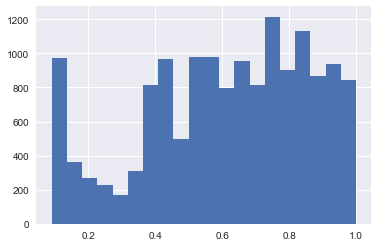

In [10]:
sns.set()
plt.hist("satisfaction", data = data, bins = 20);

###### We observe that there are two columns of type object - department and salary, which are actually categorical so these have to be converted into numerical for our ML algorithms to work

In [11]:
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [12]:
print(data.salary.unique())

['low' 'medium' 'high']


###### As it can be observed the column salary is an ordinal categorical variable(inherently ordered) and department column is an nominal(no inherent order)


## Step 3: Lets perform some encoding manipulations to transform these two columns : Salary and Department

In [13]:
data['salary'] = data.salary.astype("category")
data['salary'] = data.salary.cat.reorder_categories(["low", "medium", "high"])
data['salary'] = data.salary.cat.codes

In [14]:
departments = pd.get_dummies(data.department)

In [15]:
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [16]:
departments = departments.drop("accounting", axis = 1)

In [17]:
data = data.drop("department", axis = 1)

In [18]:
data = data.join(departments)

In [19]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


## Step 4: Its time for some descriptive statistics and visualize the data for better understanding

###### The column "churn" is the label or the target column which helps us to understand whether an employee has left the company or not

###### 0 -  stayer
###### 1 - leaver

###### Let's calculate the employee turnover rate :

In [20]:
n_employees = len(data)
print(data.churn.value_counts())
print(data.churn.value_counts()/ n_employees * 100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


###### As can be observed there are 11428 employees who stayed which accounts to 76 % of total employee count. Similarly 3571 employees left which accounts to around 24 % of them.

## Step 5: Since the data has been manipulated and munged into the shape and form that we desired, lets start to build predictive analytics model using scikit-learn package

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
target = data.churn

features = data.drop("churn", axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11249, 17)
(3750, 17)
(11249,)
(3750,)


## Step 5: Lets start off with the Decision Tree Classifier algorithm since it is known to work well in classifying employee churn and the results are easily interpretable

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, confusion_matrix, classification_report, roc_auc_score, recall_score

In [26]:
model_dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 100, class_weight = "balanced", random_state = 42)

In [27]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [28]:
print(model_dt.score(X_train, y_train) * 100)

95.86629922659792


In [29]:
print(model_dt.score(X_test, y_test) * 100)

95.62666666666667


###### As we see above the accuracy score for training dataset is 97 % and test dataset is 96 %

In [30]:
from sklearn.tree import export_graphviz

In [31]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [32]:
export_graphviz(model_dt, "tree.dot")

In [33]:
prediction = model_dt.predict(X_test)

In [34]:
print(precision_score(y_test, prediction) * 100)

89.88030467899891


In [35]:
print(recall_score(y_test, prediction) * 100)

92.08472686733556


In [36]:
print(roc_auc_score(y_test, prediction) * 100)

94.4125001318802


## Step : Lets use gridsearch to find the optimal hyperparameters for our decision tree

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
print(cross_val_score(model_dt, features, target, cv = 10))

[0.93071286 0.938      0.932      0.97       0.92066667 0.95866667
 0.96533333 0.91733333 0.92795197 0.91994663]


In [39]:
print(cross_val_score(model_dt, features, target, cv = 10).mean())

0.9380611457160647


## Let us set up a gridsearch parameters

In [40]:
params = {"max_depth" : range(5, 21, 1), "min_samples_leaf" : range(50, 500, 50)}

In [41]:
print(params)

{'max_depth': range(5, 21), 'min_samples_leaf': range(50, 500, 50)}


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_search = GridSearchCV(model_dt, params)

In [44]:
param_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 21), 'min_samples_leaf': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
print(param_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 50}


## Step : Feature importance

In [46]:
feature_importances = model_dt.feature_importances_

In [47]:
feature_list = list(features)

In [48]:
relative_importances = pd.DataFrame(index = feature_list, data = feature_importances, columns = ["importance"])

In [49]:
print(relative_importances.sort_values(by = "importance", ascending = False))

                      importance
satisfaction            0.502291
time_spend_company      0.382927
evaluation              0.086671
number_of_projects      0.017420
average_montly_hours    0.009884
technical               0.000808
promotion               0.000000
salary                  0.000000
work_accident           0.000000
RandD                   0.000000
hr                      0.000000
management              0.000000
marketing               0.000000
product_mng             0.000000
sales                   0.000000
support                 0.000000
IT                      0.000000


## Step : Selecting only most important features

In [50]:
selected_features = relative_importances[relative_importances.importance > 0.01]

In [51]:
selected_list = selected_features.index

In [52]:
X_train_selected = X_train[selected_list]
X_test_selected = X_test[selected_list]

In [53]:
print(X_train_selected.head())
print(X_test_selected.head())

       satisfaction  evaluation  number_of_projects  time_spend_company
14480          0.38        0.86                   6                   6
1934           0.78        0.93                   4                   5
7900           0.56        0.71                   5                   3
2952           0.96        0.62                   4                   2
4367           0.83        0.53                   3                   4
      satisfaction  evaluation  number_of_projects  time_spend_company
6723          0.65        0.96                   5                   2
6473          0.88        0.80                   3                   2
4679          0.69        0.98                   3                   2
862           0.41        0.47                   2                   3
7286          0.87        0.76                   5                   2


## Step : Finally let me recreate a new model including the best hyperparameters obtained by gridsearch, top 5 most important features

In [54]:
best_model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 50, class_weight = "balanced", random_state = 42)

In [55]:
best_model.fit(X_train_selected, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [56]:
best_prediction = best_model.predict(X_test_selected)

In [57]:
print(best_model.score(X_train_selected, y_train) * 100)

97.12863365632501


In [58]:
print(best_model.score(X_test_selected, y_test) * 100)

96.82666666666667


In [59]:
print(recall_score(y_test, best_prediction) * 100)

90.74693422519509


In [60]:
print(roc_auc_score(y_test, best_prediction) * 100)

94.74255228609913
